# Piemanese TM Experiment: Heuristics
## Overview
This is an experiment for finding heuristics for detecting Piemanese word pairs. This can help TM be more efficient by eliminating words that are obviously not possible translations.

In [1]:
import pandas as pd
import glob

def load_dataset(word_pairs_dir):
    rows = []
    for dirname, label in [('true', 1), ('false', 0)]:
        for filename in glob.glob(f'{word_pairs_dir}/{dirname}/*'):
            with open(filename, 'r', encoding='utf-8') as f:
                for line in f:
                    pi_word, en_word = line.strip().split('\t')
                    rows.append([pi_word, en_word, label])
    return pd.DataFrame(rows, columns=['pi_word', 'en_word', 'is_pair'])

word_pairs = load_dataset('../datasets/word_pairs')  # local path
word_pairs

,pi_word,en_word,is_pair
0,neda,need to,1
1,deliva,deliver,1
2,foods,food,1
3,at,at,1
4,yezzirr,yessir,1
...,...,...,...
9156243,his,hi,0
9156244,his,chris,0
9156245,his,hints,0
9156246,his,hives,0


## Levenshtein Ratio

<AxesSubplot:xlabel='lev_ratio', ylabel='is_pair'>

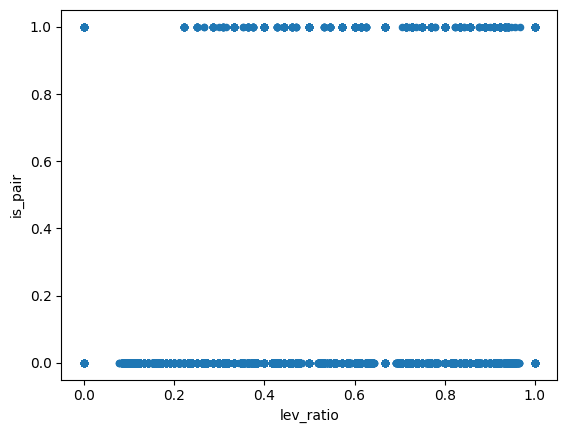

In [2]:
import Levenshtein

word_pairs['lev_ratio'] = word_pairs.apply(lambda row: Levenshtein.ratio(row['pi_word'], row['en_word']), axis=1)
word_pairs.plot(x='lev_ratio', y='is_pair', kind='scatter')

<AxesSubplot:xlabel='lev_ratio_cons', ylabel='is_pair'>

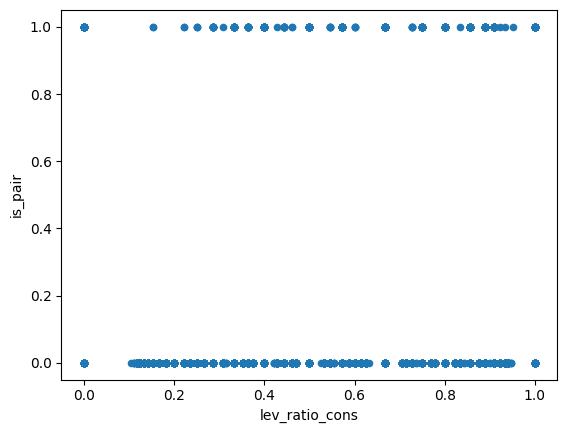

In [4]:
import re

def cons_only(word):
    return re.sub(r'[aiueo]', '', word)

word_pairs['lev_ratio_cons'] = word_pairs.apply(
    lambda row: Levenshtein.ratio(cons_only(row['pi_word']), cons_only(row['en_word'])), axis=1)
word_pairs.plot(x='lev_ratio_cons', y='is_pair', kind='scatter')